# Clasificador de doggos cute
## Aranguren Bonil, Juan David
## Cruz franco, Jessica Alexandra 

Se importan las bibliotecas

In [12]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

Para iniciar se necesita ubicar la carpeta donde tenemos las imagenes de entrenamiento y testeo

In [13]:
PATH = os.path.join('C:/Users/reino/Documents/archivospython/doggos')

Se separan las direcciones de entrenamiento y testeo

In [14]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'test')

Se guardan cada uno de los directorios de las razas seleciionadas para entrenamiento y testeo.

In [18]:
train_aki_dir = os.path.join(train_dir, 'akita_dog')
train_chi_dir = os.path.join(train_dir, 'chihuahua_dog')
train_cho_dir = os.path.join(train_dir, 'chow_chow_dog')
train_dob_dir = os.path.join(train_dir, 'dobermann_dog')
train_lab_dir = os.path.join(train_dir, 'labrador_dog')
train_pom_dir = os.path.join(train_dir, 'pomeranian_dog')
train_poo_dir = os.path.join(train_dir, 'poodle_dog')
train_pug_dir = os.path.join(train_dir, 'pug_dog')
train_sam_dir = os.path.join(train_dir, 'samoyed_dog')
train_shih_dir = os.path.join(train_dir, 'shih_tzu_dog')
train_sib_dir = os.path.join(train_dir, 'siberian_husky_dog')
train_st_dir = os.path.join(train_dir, 'st._bernard_dog')


validation_aki_dir = os.path.join(validation_dir, 'akita_dog')
validation_chi_dir = os.path.join(validation_dir, 'chihuahua_dog')
validation_cho_dir = os.path.join(validation_dir, 'chow_chow_dog')
validation_dob_dir = os.path.join(validation_dir, 'dobermann_dog')
validation_lab_dir = os.path.join(validation_dir, 'labrador_dog')
validation_pom_dir = os.path.join(validation_dir, 'pomeranian_dog')
validation_poo_dir = os.path.join(validation_dir, 'poodle_dog')
validation_pug_dir = os.path.join(validation_dir, 'pug_dog')
validation_sam_dir = os.path.join(validation_dir, 'samoyed_dog')
validation_shih_dir = os.path.join(validation_dir, 'shih_tzu_dog')
validation_sib_dir = os.path.join(validation_dir, 'siberian_husky_dog')
validation_st_dir = os.path.join(validation_dir, 'st._bernard_dog') 

Contamos el número total de imágenes de entrenamiento y testeo.

In [21]:
num_aki_tr = len(os.listdir(train_aki_dir))
num_chi_tr = len(os.listdir(train_chi_dir))
num_cho_tr = len(os.listdir(train_cho_dir))
num_dob_tr = len(os.listdir(train_dob_dir))
num_lab_tr = len(os.listdir(train_lab_dir))
num_pom_tr = len(os.listdir(train_pom_dir))
num_poo_tr = len(os.listdir(train_poo_dir))
num_pug_tr = len(os.listdir(train_pug_dir))
num_sam_tr = len(os.listdir(train_sam_dir))
num_shih_tr = len(os.listdir(train_shih_dir))
num_sib_tr = len(os.listdir(train_sib_dir))
num_st_tr = len(os.listdir(train_st_dir))

num_aki_val = len(os.listdir(validation_aki_dir))
num_chi_val = len(os.listdir(validation_chi_dir))
num_cho_val = len(os.listdir(validation_cho_dir))
num_dob_val = len(os.listdir(validation_dob_dir))
num_lab_val = len(os.listdir(validation_lab_dir))
num_pom_val = len(os.listdir(validation_pom_dir))
num_poo_val = len(os.listdir(validation_poo_dir))
num_pug_val = len(os.listdir(validation_pug_dir))
num_sam_val = len(os.listdir(validation_sam_dir))
num_shih_val = len(os.listdir(validation_shih_dir))
num_sib_val = len(os.listdir(validation_sib_dir))
num_st_val = len(os.listdir(validation_st_dir))

total_train = num_aki_tr + num_chi_tr + num_cho_tr + num_dob_tr + num_lab_tr + num_pom_tr + num_poo_tr + num_pug_tr + num_sam_tr + num_shih_tr + num_sib_tr + num_st_tr
total_val = num_aki_val + num_chi_val + num_cho_val + num_dob_val + num_lab_val + num_pom_val + num_poo_val + num_pug_val + num_sam_val + num_shih_val + num_sib_val + num_st_val

In [22]:
print("Total perritos de entrenamiento:", total_train)
print("Total perritos de testeo:", total_val)


Total perritos de entrenamiento: 1900
Total perritos de testeo: 433


Al tener 1900 imágenes para el entrenamiento, decimos que por iteraciones se utilizan 30 ejemplos y llegamos hasta 50 iteraciones.

Además ponemos unas medidas predeterminadas para todas las imágenes.

In [23]:
batch_size = 30
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150


Como las redes neuronales prefieren valores de entrada simplificados, se reescalan los valores de las imágenes de 255 a 1 (valores en pixeles)

In [24]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

Se ajustan todas las imágenes al mismo tamaño para poder entrenar al sistema.

In [25]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')


Found 1900 images belonging to 12 classes.


In [26]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')


Found 433 images belonging to 12 classes.


In [27]:
sample_training_images, _ = next(train_data_gen)


Se plotean 5 imagenes de entrenamiento para verificar los ajustes.

In [28]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


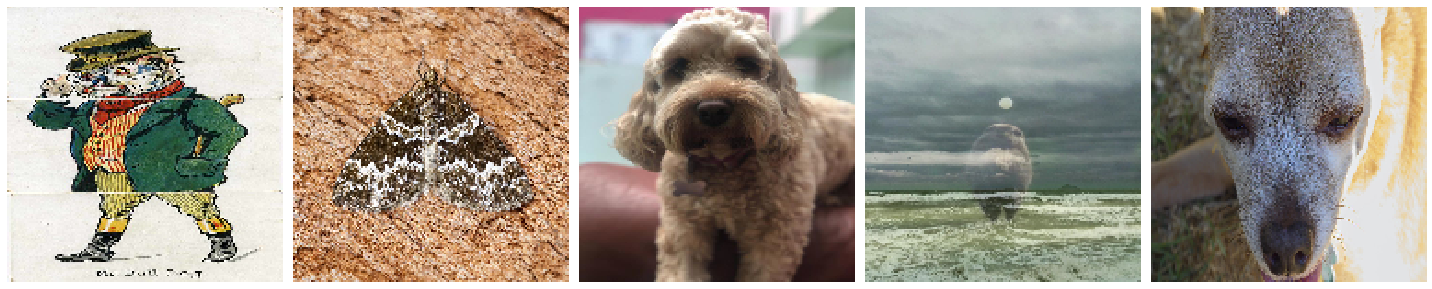

In [29]:
plotImages(sample_training_images[:5])


Se sube el modelo a usar, con las respectivas capas y la densidad que cambia con la cantidad de clases

In [30]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(12, activation='sigmoid')
])


W1107 11:56:08.731215  7876 deprecation.py:506] From C:\Users\reino\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [31]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Se empieza a alimentar el sistema y a realizar las iteraciones, teniendo en cuenta la exactitud y las pérdidas.

In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [33]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/50


W1107 11:56:15.738479  7876 deprecation.py:323] From C:\Users\reino\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


63/63 [==============================] - 57s 900ms/step - loss: 2.4890 - acc: 0.1043 - val_loss: 2.4737 - val_acc: 0.1167
Epoch 2/50
63/63 [==============================] - 32s 512ms/step - loss: 2.3745 - acc: 0.1807 - val_loss: 2.4586 - val_acc: 0.1452
Epoch 3/50
63/63 [==============================] - 32s 509ms/step - loss: 2.1732 - acc: 0.2636 - val_loss: 2.5535 - val_acc: 0.1786
Epoch 4/50
63/63 [==============================] - 31s 495ms/step - loss: 1.7074 - acc: 0.4369 - val_loss: 2.7612 - val_acc: 0.1690
Epoch 5/50
63/63 [==============================] - 32s 501ms/step - loss: 1.1005 - acc: 0.6406 - val_loss: 3.8131 - val_acc: 0.1119
Epoch 6/50
63/63 [==============================] - 32s 516ms/step - loss: 0.5272 - acc: 0.8321 - val_loss: 4.6756 - val_acc: 0.1595
Epoch 7/50
63/63 [==============================] - 34s 534ms/step - loss: 0.2659 - acc: 0.9321 - val_loss: nan - val_acc: 0.1619
Epoch 8/50
63/63 [==============================] - 36s 568ms/step - loss: 0.1187 -

Graficamos las pérdidas y exactitudes del entrenamiento y el testeo.

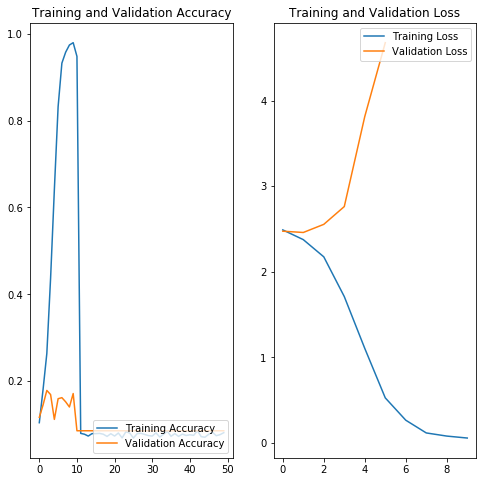

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Como obtenemos valores bastante bajos en nuestro modelo, se opta por modificar las imágenes a diferentes posiciones y perspectivas para mejorar su rendimiento.

In [35]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)


In [36]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 1900 images belonging to 12 classes.


In [37]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

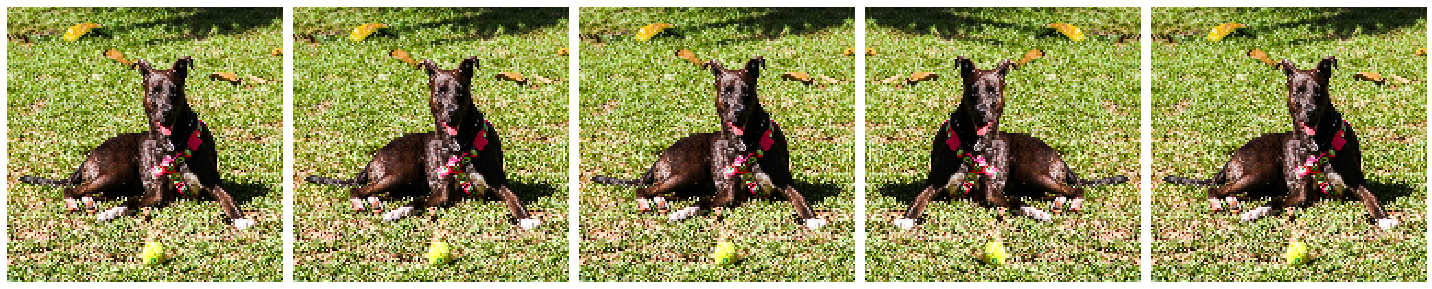

In [38]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)


In [39]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)


In [53]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 1900 images belonging to 12 classes.


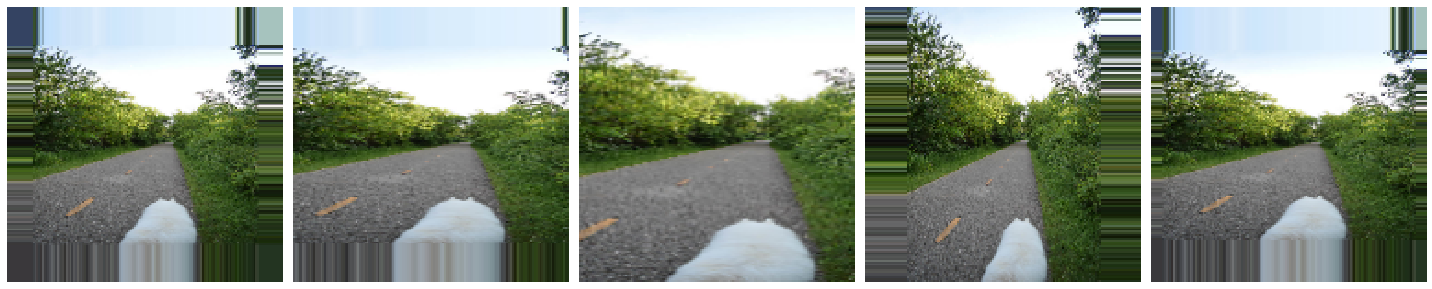

In [54]:
plotImages(augmented_images)


In [42]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)


In [43]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 1900 images belonging to 12 classes.


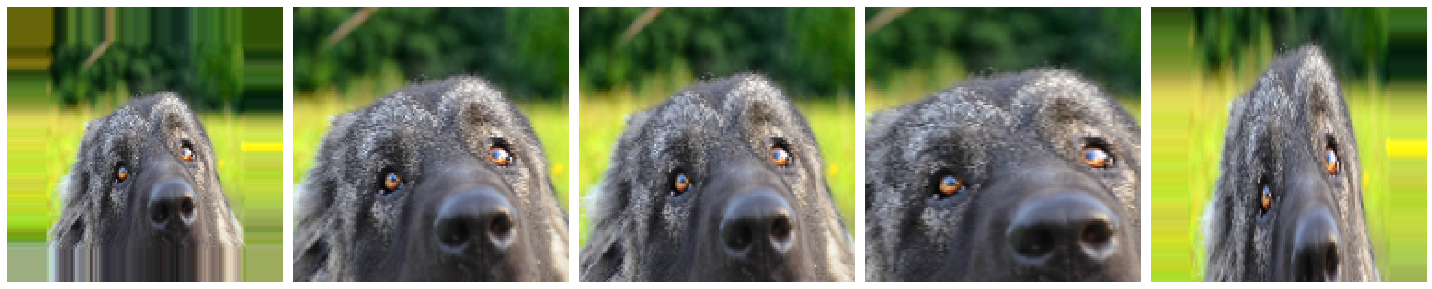

In [44]:
plotImages(augmented_images)


In [45]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


In [46]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')


Found 1900 images belonging to 12 classes.


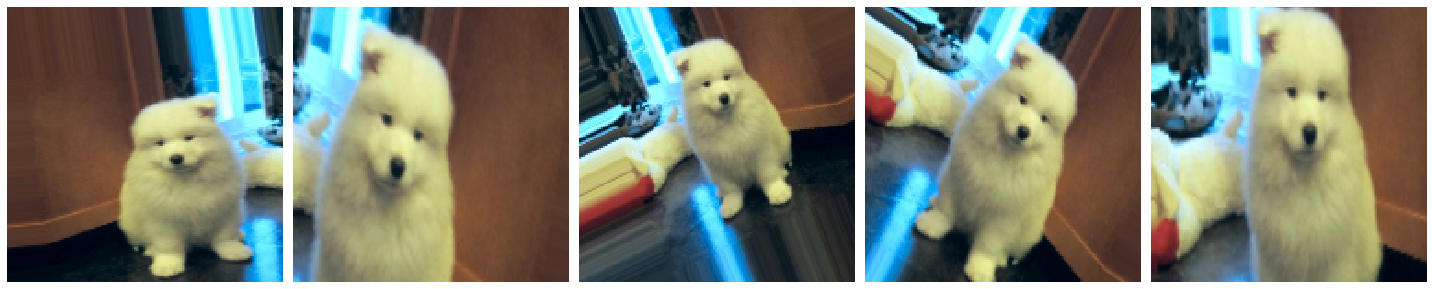

In [47]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [48]:
image_gen_val = ImageDataGenerator(rescale=1./255)


In [49]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical')


Found 433 images belonging to 12 classes.


In [50]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(12, activation='sigmoid')
])


In [51]:
model_new.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_new.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

In [52]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/50
63/63 [==============================] - 50s 792ms/step - loss: 2.4988 - acc: 0.0781 - val_loss: 2.4844 - val_acc: 0.0905
Epoch 2/50
63/63 [==============================] - 51s 804ms/step - loss: 2.4848 - acc: 0.0947 - val_loss: 2.4831 - val_acc: 0.0976
Epoch 3/50
63/63 [==============================] - 51s 810ms/step - loss: 2.4752 - acc: 0.0995 - val_loss: 2.4788 - val_acc: 0.0881
Epoch 4/50
63/63 [==============================] - 49s 771ms/step - loss: 2.4596 - acc: 0.1097 - val_loss: 2.4566 - val_acc: 0.1000
Epoch 5/50
63/63 [==============================] - 49s 785ms/step - loss: 2.4413 - acc: 0.1342 - val_loss: 2.4793 - val_acc: 0.1262
Epoch 6/50
63/63 [==============================] - 45s 708ms/step - loss: 2.4249 - acc: 0.1235 - val_loss: 2.4920 - val_acc: 0.1524
Epoch 7/50
63/63 [==============================] - 47s 750ms/step - loss: 2.4116 - acc: 0.1663 - val_loss: 2.4660 - val_acc: 0.1238
Epoch 8/50
63/63 [==============================] - 53s 848ms/step - 

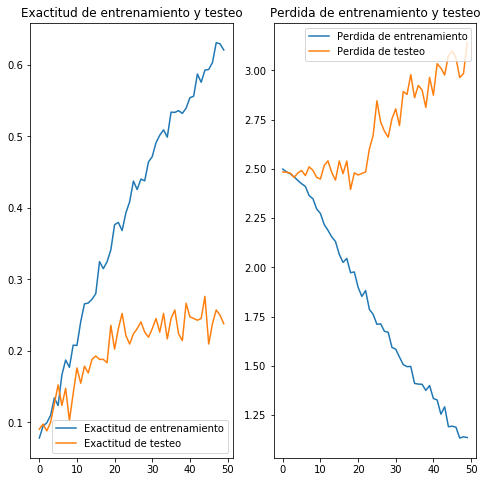

In [56]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Exactitud de entrenamiento')
plt.plot(epochs_range, val_acc, label='Exactitud de testeo')
plt.legend(loc='lower right')
plt.title('Exactitud de entrenamiento y testeo')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Perdida de entrenamiento')
plt.plot(epochs_range, val_loss, label='Perdida de testeo')
plt.legend(loc='upper right')
plt.title('Perdida de entrenamiento y testeo')
plt.show()


## Conclusiones
-Al implementar un CNN se evidencia que de forma binaria tiende a tener menos errores de clasificado, al agregar más categorias o clases este presenta acumulaciones de pérdidas.

-Para obtener mejores resultados en el entrenamiento y el testeo es necesario cambiar las acaracterísticas de las imágenes, entre más variaciones de imágen, mejor se comporta el sistema.